##  Install the EVA4 packages, hosted @ github

In [1]:
!pip install git+https://git@github.com/ojhajayant/eva.git

  Cloning https://****@github.com/ojhajayant/eva.git to c:\users\ojhaj\appdata\local\temp\pip-req-build-lj3t13ze
  Created wheel for eva: filename=eva-0.0.1-py3-none-any.whl size=30703 sha256=abc9db3ca7f28531cf9528588381f05656f9407c4f76bbeba03b38cbef2db56d
  Stored in directory: C:\Users\ojhaj\AppData\Local\Temp\pip-ephem-wheel-cache-vfjdpdho\wheels\10\eb\41\b45f3a92716bbd015028946c2b4873f4622041a4db30191fb6
Successfully built eva
  Attempting uninstall: eva
    Found existing installation: eva 0.0.0
    Uninstalling eva-0.0.0:
      Successfully uninstalled eva-0.0.0


  Running command git clone -q 'https://****@github.com/ojhajayant/eva.git' 'C:\Users\ojhaj\AppData\Local\Temp\pip-req-build-lj3t13ze'


In [2]:
from datetime import datetime

# current date and time
now = datetime.now()

timestamp = datetime.timestamp(now)
print("timestamp =", timestamp)
print("now =", now)

timestamp = 1584355667.991932
now = 2020-03-16 16:17:47.991932


# Import Libraries

In [6]:
from __future__ import print_function

import os
import sys
import warnings

import numpy as np
import torch
import torch.optim as optim
from torchsummary import summary

from week7.modular import cfg
from week7.modular.models import resnet18, s5_s6_custom_model_mnist, s7_custom_model_cifar10, QuizDNN
from week7.modular import preprocess
from week7.modular import test
from week7.modular import train
from week7.modular import utils

sys.path.append('./')
global args
args = cfg.args
args.IPYNB_ENV = True

### Save the config file, with all default/provided/required configuration

In [7]:
print("The config used for this run are being saved @ {}".format(os.path.join(args.prefix, 'config_params.txt')))
utils.write(vars(args), os.path.join(args.prefix, 'config_params.txt'))

The config used for this run are being saved @ data\config_params.txt


### Calculate mean & std for Normalization

In [8]:
args.dataset = 'CIFAR10'
mean, std = preprocess.get_dataset_mean_std()

Files already downloaded and verified
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]


###  Dataloader Arguments & Test/Train Dataloaders

In [9]:
if np.ndim(mean) ==0:
    train_dataset, test_dataset, train_loader, test_loader = preprocess.preprocess_data((mean,), (std,))
else:
    train_dataset, test_dataset, train_loader, test_loader = preprocess.preprocess_data((mean[0], mean[1], mean[2]),
                                                              (std[0], std[1], std[2]))

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


### Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

[Stats from Train Data]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: torch.Size([50000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)
[Stats from Test Data]
 - Numpy Shape: (10000, 32, 32, 3)
 - Tensor Shape: torch.Size([10000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([64, 3, 32, 32])
torch.Size([64])
Saving plot for a sample to ascertain RF required for edges & gradient D:\PG-ML\eva4\week9\./data/data_stats.png


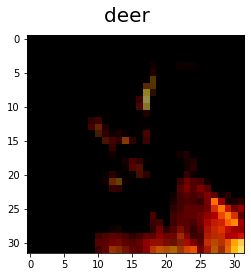

In [10]:
preprocess.get_data_stats(train_dataset, test_dataset, train_loader)

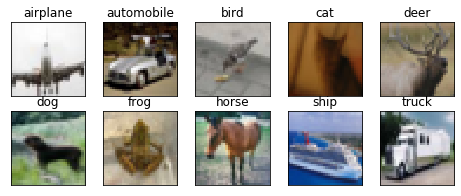

In [11]:
utils.plot_train_samples(train_loader)

### Using L1-regularization here 
(l1_weight = 0.000025, started out reusing some older assignment values, but works OK here too)

In [12]:
L1 = args.L1  
L1 = False
print("L1:", L1)
L2 = args.L2   
print("L2:", L2)

L1: False
L2: False


### detect the device being run on

In [13]:
device = torch.device("cuda" if args.cuda else "cpu")
print(device)

cuda


### Get the model loaded with summary

In [14]:
model = QuizDNN.QuizDNN().to(device)
if args.dataset == 'CIFAR10':
    summary(model, input_size=(3, 32, 32))
elif args.dataset == 'MNIST':
    summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 3, 32, 32]              81
       BatchNorm2d-2            [-1, 3, 32, 32]               6
           Dropout-3            [-1, 3, 32, 32]               0
              ReLU-4            [-1, 3, 32, 32]               0
            Conv2d-5            [-1, 3, 32, 32]              81
       BatchNorm2d-6            [-1, 3, 32, 32]               6
           Dropout-7            [-1, 3, 32, 32]               0
              ReLU-8            [-1, 3, 32, 32]               0
         MaxPool2d-9            [-1, 3, 16, 16]               0
           Conv2d-10            [-1, 3, 16, 16]              81
      BatchNorm2d-11            [-1, 3, 16, 16]               6
          Dropout-12            [-1, 3, 16, 16]               0
             ReLU-13            [-1, 3, 16, 16]               0
           Conv2d-14            [-1, 3,

## Training and Testing

  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

Model training starts on CIFAR10 dataset
EPOCH: 1


Loss=1.7054492235183716 Batch_id=781 Accuracy=22.58: 100%|███████████████████████████| 782/782 [00:16<00:00, 47.91it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.8074, Accuracy: 2696/10000 (26.96%)

validation-accuracy improved from 0 to 26.96, saving model to D:\PG-ML\eva4\week9\./saved_models/CIFAR10_model_epoch-1_L1-1_L2-0_val_acc-26.96.h5
EPOCH: 2


Loss=1.9071078300476074 Batch_id=781 Accuracy=29.10: 100%|███████████████████████████| 782/782 [00:18<00:00, 42.31it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.8245, Accuracy: 2927/10000 (29.27%)

validation-accuracy improved from 26.96 to 29.27, saving model to D:\PG-ML\eva4\week9\./saved_models/CIFAR10_model_epoch-2_L1-1_L2-0_val_acc-29.27.h5
EPOCH: 3


Loss=1.6712337732315063 Batch_id=781 Accuracy=30.53: 100%|███████████████████████████| 782/782 [00:15<00:00, 49.23it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7400, Accuracy: 3030/10000 (30.30%)

validation-accuracy improved from 29.27 to 30.3, saving model to D:\PG-ML\eva4\week9\./saved_models/CIFAR10_model_epoch-3_L1-1_L2-0_val_acc-30.3.h5
EPOCH: 4


Loss=1.8115901947021484 Batch_id=781 Accuracy=31.21: 100%|███████████████████████████| 782/782 [00:16<00:00, 48.36it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6843, Accuracy: 3321/10000 (33.21%)

validation-accuracy improved from 30.3 to 33.21, saving model to D:\PG-ML\eva4\week9\./saved_models/CIFAR10_model_epoch-4_L1-1_L2-0_val_acc-33.21.h5
EPOCH: 5


Loss=1.722839593887329 Batch_id=781 Accuracy=31.78: 100%|████████████████████████████| 782/782 [00:16<00:00, 48.33it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6959, Accuracy: 3251/10000 (32.51%)

EPOCH: 6


Loss=1.5687267780303955 Batch_id=781 Accuracy=32.17: 100%|███████████████████████████| 782/782 [00:16<00:00, 47.18it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6696, Accuracy: 3362/10000 (33.62%)

validation-accuracy improved from 33.21 to 33.62, saving model to D:\PG-ML\eva4\week9\./saved_models/CIFAR10_model_epoch-6_L1-1_L2-0_val_acc-33.62.h5
EPOCH: 7


Loss=1.716970682144165 Batch_id=781 Accuracy=32.53: 100%|████████████████████████████| 782/782 [00:16<00:00, 46.62it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6672, Accuracy: 3353/10000 (33.53%)

EPOCH: 8


Loss=2.3667445182800293 Batch_id=781 Accuracy=33.07: 100%|███████████████████████████| 782/782 [00:16<00:00, 48.77it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7069, Accuracy: 3272/10000 (32.72%)

EPOCH: 9


Loss=1.6219483613967896 Batch_id=781 Accuracy=33.05: 100%|███████████████████████████| 782/782 [00:15<00:00, 48.91it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7685, Accuracy: 2988/10000 (29.88%)

EPOCH: 10


Loss=2.2823448181152344 Batch_id=781 Accuracy=33.80: 100%|███████████████████████████| 782/782 [00:15<00:00, 49.89it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 2.1196, Accuracy: 2263/10000 (22.63%)

EPOCH: 11


Loss=1.540696620941162 Batch_id=781 Accuracy=34.10: 100%|████████████████████████████| 782/782 [00:16<00:00, 48.60it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7187, Accuracy: 3335/10000 (33.35%)

EPOCH: 12


Loss=1.4660193920135498 Batch_id=781 Accuracy=34.13: 100%|███████████████████████████| 782/782 [00:15<00:00, 49.35it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6340, Accuracy: 3561/10000 (35.61%)

validation-accuracy improved from 33.62 to 35.61, saving model to D:\PG-ML\eva4\week9\./saved_models/CIFAR10_model_epoch-12_L1-1_L2-0_val_acc-35.61.h5
EPOCH: 13


Loss=1.7118993997573853 Batch_id=781 Accuracy=34.50: 100%|███████████████████████████| 782/782 [00:15<00:00, 49.13it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6640, Accuracy: 3400/10000 (34.00%)

EPOCH: 14


Loss=1.788002610206604 Batch_id=781 Accuracy=34.57: 100%|████████████████████████████| 782/782 [00:16<00:00, 48.08it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7938, Accuracy: 3172/10000 (31.72%)

EPOCH: 15


Loss=1.6391897201538086 Batch_id=781 Accuracy=34.65: 100%|███████████████████████████| 782/782 [00:16<00:00, 48.81it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6536, Accuracy: 3369/10000 (33.69%)

EPOCH: 16


Loss=2.0579493045806885 Batch_id=781 Accuracy=34.70: 100%|███████████████████████████| 782/782 [00:16<00:00, 46.59it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7826, Accuracy: 3082/10000 (30.82%)

EPOCH: 17


Loss=1.7030260562896729 Batch_id=781 Accuracy=34.61: 100%|███████████████████████████| 782/782 [00:16<00:00, 47.39it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6618, Accuracy: 3437/10000 (34.37%)

EPOCH: 18


Loss=1.4471766948699951 Batch_id=781 Accuracy=34.92: 100%|███████████████████████████| 782/782 [00:16<00:00, 48.09it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6174, Accuracy: 3569/10000 (35.69%)

validation-accuracy improved from 35.61 to 35.69, saving model to D:\PG-ML\eva4\week9\./saved_models/CIFAR10_model_epoch-18_L1-1_L2-0_val_acc-35.69.h5
EPOCH: 19


Loss=1.5409395694732666 Batch_id=781 Accuracy=35.10: 100%|███████████████████████████| 782/782 [00:16<00:00, 48.28it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6026, Accuracy: 3617/10000 (36.17%)

validation-accuracy improved from 35.69 to 36.17, saving model to D:\PG-ML\eva4\week9\./saved_models/CIFAR10_model_epoch-19_L1-1_L2-0_val_acc-36.17.h5
EPOCH: 20


Loss=1.9332051277160645 Batch_id=781 Accuracy=35.00: 100%|███████████████████████████| 782/782 [00:16<00:00, 47.05it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6351, Accuracy: 3596/10000 (35.96%)

EPOCH: 21


Loss=1.7217375040054321 Batch_id=781 Accuracy=35.25: 100%|███████████████████████████| 782/782 [00:16<00:00, 46.27it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6032, Accuracy: 3653/10000 (36.53%)

validation-accuracy improved from 36.17 to 36.53, saving model to D:\PG-ML\eva4\week9\./saved_models/CIFAR10_model_epoch-21_L1-1_L2-0_val_acc-36.53.h5
EPOCH: 22


Loss=2.4096479415893555 Batch_id=781 Accuracy=35.32: 100%|███████████████████████████| 782/782 [00:16<00:00, 46.59it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7101, Accuracy: 3352/10000 (33.52%)

EPOCH: 23


Loss=1.8300316333770752 Batch_id=781 Accuracy=35.22: 100%|███████████████████████████| 782/782 [00:16<00:00, 46.23it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6150, Accuracy: 3644/10000 (36.44%)

EPOCH: 24


Loss=1.5662654638290405 Batch_id=781 Accuracy=35.39: 100%|███████████████████████████| 782/782 [00:16<00:00, 46.27it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6096, Accuracy: 3659/10000 (36.59%)

validation-accuracy improved from 36.53 to 36.59, saving model to D:\PG-ML\eva4\week9\./saved_models/CIFAR10_model_epoch-24_L1-1_L2-0_val_acc-36.59.h5
EPOCH: 25


Loss=2.00936222076416 Batch_id=781 Accuracy=35.56: 100%|█████████████████████████████| 782/782 [00:17<00:00, 45.16it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6626, Accuracy: 3492/10000 (34.92%)

EPOCH: 26


Loss=1.6312766075134277 Batch_id=781 Accuracy=35.46: 100%|███████████████████████████| 782/782 [00:16<00:00, 47.30it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6194, Accuracy: 3583/10000 (35.83%)

EPOCH: 27


Loss=1.532776117324829 Batch_id=781 Accuracy=35.50: 100%|████████████████████████████| 782/782 [00:16<00:00, 46.94it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7181, Accuracy: 3241/10000 (32.41%)

EPOCH: 28


Loss=1.2418334484100342 Batch_id=781 Accuracy=35.24: 100%|███████████████████████████| 782/782 [00:16<00:00, 48.45it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7179, Accuracy: 3370/10000 (33.70%)

EPOCH: 29


Loss=1.5577905178070068 Batch_id=781 Accuracy=35.55: 100%|███████████████████████████| 782/782 [00:16<00:00, 48.11it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.5922, Accuracy: 3614/10000 (36.14%)

EPOCH: 30


Loss=1.861774206161499 Batch_id=781 Accuracy=35.37: 100%|████████████████████████████| 782/782 [00:17<00:00, 45.59it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6874, Accuracy: 3400/10000 (34.00%)

EPOCH: 31


Loss=2.0615222454071045 Batch_id=781 Accuracy=35.47: 100%|███████████████████████████| 782/782 [00:15<00:00, 49.28it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7789, Accuracy: 3120/10000 (31.20%)

EPOCH: 32


Loss=1.9375280141830444 Batch_id=781 Accuracy=35.55: 100%|███████████████████████████| 782/782 [00:16<00:00, 47.85it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6371, Accuracy: 3571/10000 (35.71%)

EPOCH: 33


Loss=1.583477258682251 Batch_id=781 Accuracy=35.70: 100%|████████████████████████████| 782/782 [00:16<00:00, 48.35it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.5885, Accuracy: 3657/10000 (36.57%)

EPOCH: 34


Loss=1.5610833168029785 Batch_id=781 Accuracy=35.58: 100%|███████████████████████████| 782/782 [00:16<00:00, 48.14it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6448, Accuracy: 3529/10000 (35.29%)

EPOCH: 35


Loss=1.2944236993789673 Batch_id=781 Accuracy=35.56: 100%|███████████████████████████| 782/782 [00:16<00:00, 48.57it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.5864, Accuracy: 3735/10000 (37.35%)

validation-accuracy improved from 36.59 to 37.35, saving model to D:\PG-ML\eva4\week9\./saved_models/CIFAR10_model_epoch-35_L1-1_L2-0_val_acc-37.35.h5
EPOCH: 36


Loss=1.8715571165084839 Batch_id=781 Accuracy=35.76: 100%|███████████████████████████| 782/782 [00:16<00:00, 48.77it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7231, Accuracy: 3358/10000 (33.58%)

EPOCH: 37


Loss=1.9061721563339233 Batch_id=781 Accuracy=35.77: 100%|███████████████████████████| 782/782 [00:16<00:00, 47.60it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6047, Accuracy: 3628/10000 (36.28%)

EPOCH: 38


Loss=1.2775022983551025 Batch_id=781 Accuracy=35.69: 100%|███████████████████████████| 782/782 [00:16<00:00, 46.89it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6640, Accuracy: 3563/10000 (35.63%)

EPOCH: 39


Loss=1.2539228200912476 Batch_id=781 Accuracy=35.33: 100%|███████████████████████████| 782/782 [00:16<00:00, 46.55it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6675, Accuracy: 3423/10000 (34.23%)

EPOCH: 40


Loss=1.584349274635315 Batch_id=781 Accuracy=35.73: 100%|████████████████████████████| 782/782 [00:16<00:00, 46.32it/s]



Test set: Average loss: 1.6091, Accuracy: 3693/10000 (36.93%)



C:\Users\ojhaj\Anaconda3\lib\site-packages\week7\modular\utils.py:207: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


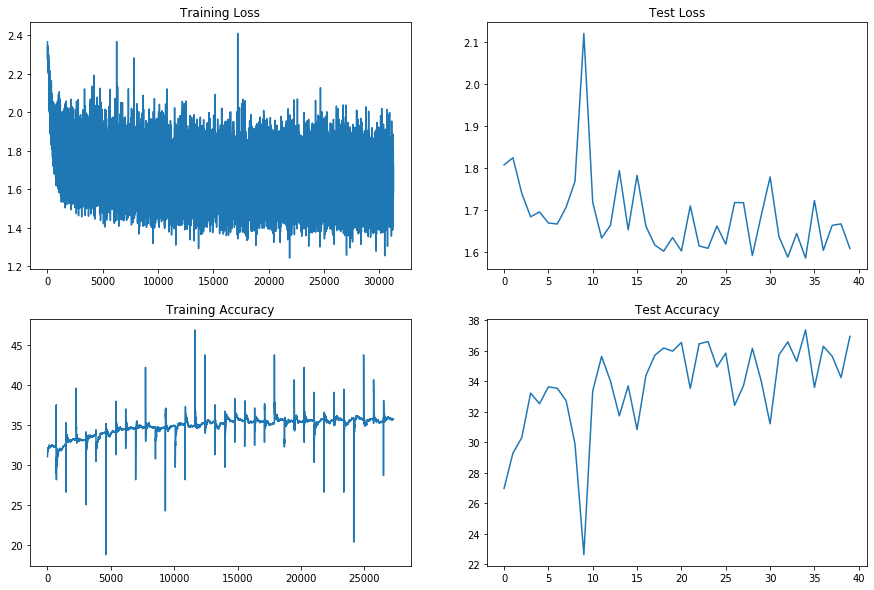

In [15]:
print("Model training starts on {} dataset".format(args.dataset))
# Enable L2-regularization with supplied value of weight decay, or keep it default-0
if L2:
    weight_decay = args.l2_weight_decay
else:
    weight_decay = 0
# lr = args.lr
args.lr = 0.01#For this custom model, this lr was found to be good.
lr = args.lr
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=weight_decay)

#EPOCHS = args.epochs
args.epochs = 40
EPOCHS = args.epochs
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train.train(model, device, train_loader, optimizer, epoch)
    test.test(model, device, test_loader, optimizer, epoch)
utils.plot_acc_loss()

### model-prediction & mislabelled images

Model inference starts on CIFAR10  dataset
Loaded the best model: CIFAR10_model_epoch-35_L1-1_L2-0_val_acc-37.35.h5 from last training session
The confusion-matrix and classification-report for this model are:
[[369  48  93   6  13   4  10  21 411  25]
 [ 57 570  10   1   6   1   0  30 201 124]
 [161   5 238  71 226  55 135  72  23  14]
 [ 55  13 103 144 195 230  69 148  14  29]
 [ 84   6 153 101 321  98 157  60  10  10]
 [ 39   5  84 162 142 347  23 168   3  27]
 [ 31   0 100  54 186  35 570  18   2   4]
 [ 38   5  69 143 113 180  22 348   9  73]
 [201  78  31   2   5   0   6  16 641  20]
 [ 86 472  24   3   9   2   1  65 151 187]]
              precision    recall  f1-score   support

    airplane       0.33      0.37      0.35      1000
  automobile       0.47      0.57      0.52      1000
        bird       0.26      0.24      0.25      1000
         cat       0.21      0.14      0.17      1000
        deer       0.26      0.32      0.29      1000
         dog       0.36      0.35 

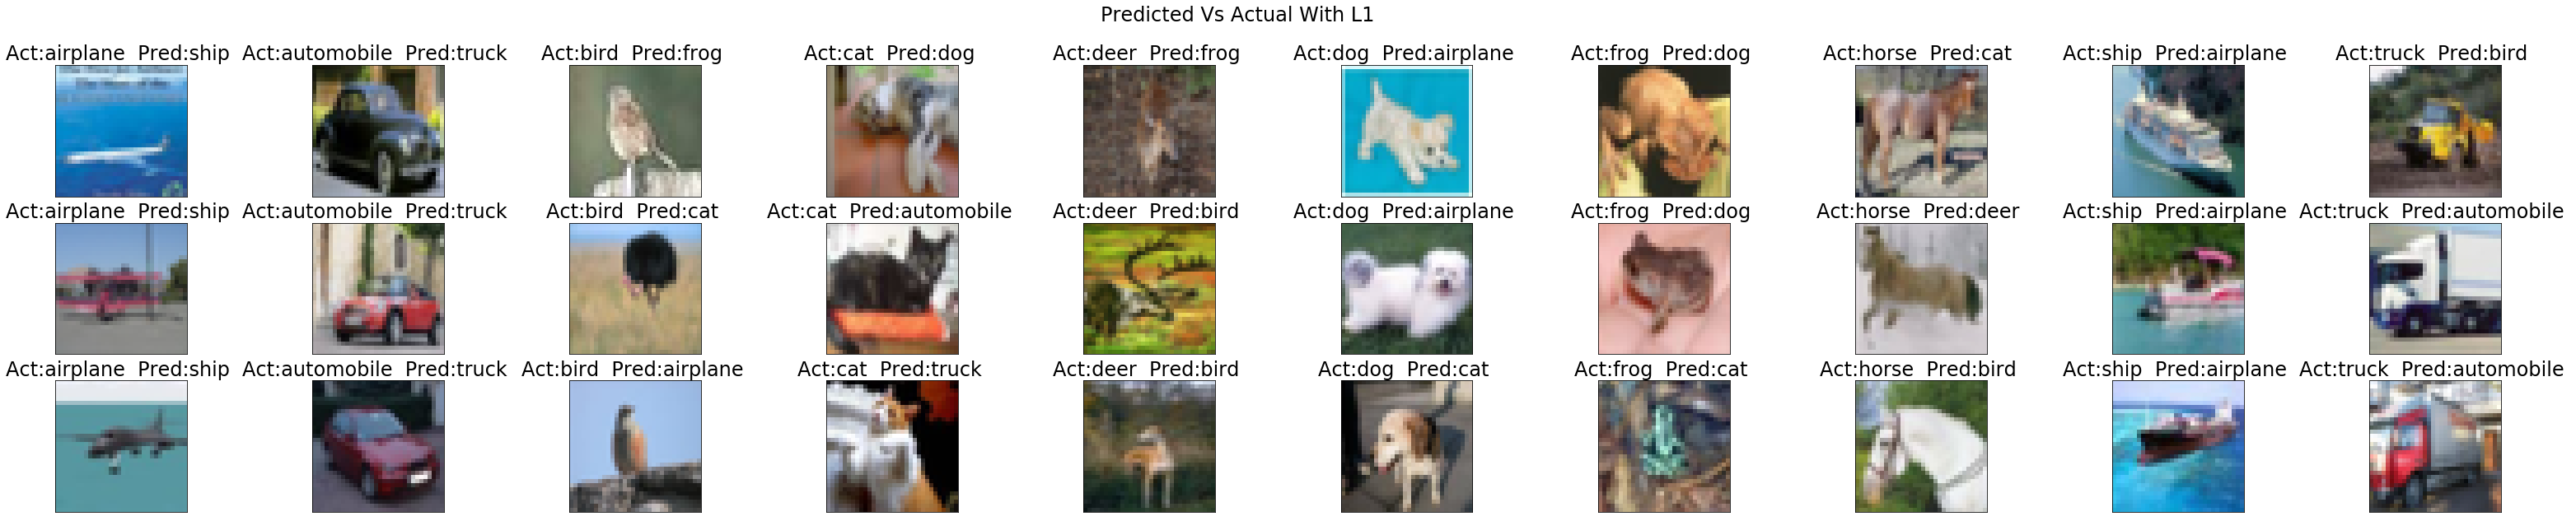

In [16]:
print("Model inference starts on {}  dataset".format(args.dataset))
#model_name = args.best_model
model_name = 'CIFAR10_model_epoch-35_L1-1_L2-0_val_acc-37.35.h5'#saved best model
print("Loaded the best model: {} from last training session".format(model_name))
model = utils.load_model(QuizDNN.QuizDNN(), device, model_name=model_name)
y_test = np.array(test_dataset.targets)
print("The confusion-matrix and classification-report for this model are:")
y_pred = utils.model_pred(model, device, y_test, test_dataset)
x_test = test_dataset.data
utils.display_mislabelled(model, device, x_test, y_test.reshape(-1, 1), y_pred, test_dataset, title_str='Predicted Vs Actual With L1')

In [17]:
from datetime import datetime

# current date and time
now = datetime.now()

timestamp = datetime.timestamp(now)
print("timestamp =", timestamp)
print("now =", now)

timestamp = 1584356775.326576
now = 2020-03-16 16:36:15.326576
